In [29]:
import pickle

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from yellowbrick.classifier import ConfusionMatrix

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.naive_bayes import CategoricalNB, BernoulliNB, GaussianNB
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report

## Credit risk

In [2]:
rdata = pd.read_csv('/home/tuts/data/mldsfromatoz/risco_credito.csv')

In [3]:
rdata.head()

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo


In [4]:
X = rdata[['historia', 'divida', 'garantias', 'renda']]
y = rdata[['risco']]

In [5]:
X.historia.value_counts()

desconhecida    5
boa             5
ruim            4
Name: historia, dtype: int64

In [6]:
X.divida.value_counts()

alta     7
baixa    7
Name: divida, dtype: int64

In [7]:
X.garantias.value_counts()

nenhuma     11
adequada     3
Name: garantias, dtype: int64

In [8]:
X.renda.value_counts()

acima_35    7
15_35       4
0_15        3
Name: renda, dtype: int64

In [9]:
def encode_cols(df):
    encoders = list()
    for col in df.columns:
        l = LabelEncoder()
        l.fit(df[col])
        encoders.append(l)
        df[col] = l.transform(df[col])
    return encoders
        
        
X_encoders = encode_cols(X)
y_encoder = encode_cols(y)[0] # not necessary

/tmp/ipykernel_7266/2062073660.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = l.transform(df[col])


In [10]:
len(X_encoders)

4

In [11]:
X.head()

,historia,divida,garantias,renda
0,2,0,1,0
1,1,0,1,1
2,1,1,1,1
3,1,1,1,2
4,1,1,1,2


In [12]:
y.head()

,risco
0,0
1,0
2,2
3,0
4,1


In [13]:
nb = GaussianNB()

nb.fit(X.values, y.risco.values)

GaussianNB()

In [14]:
client = [
    ['boa', 'ruim'],
    ['alta', 'alta'],
    ['nenhuma', 'adequada'],
    ['acima_35', '0_15']
]

client_encoded = list()

for client_attr, encoder in zip(client, X_encoders):
    client_encoded.append(encoder.transform(client_attr))

client_encoded

[array([0, 2]), array([0, 0]), array([1, 0]), array([2, 0])]

In [15]:
pred_1 = nb.predict(np.array([item[0] for item in client_encoded]).reshape(1, 4))
pred_2 = nb.predict(np.array([item[1] for item in client_encoded]).reshape(1, 4))

In [16]:
print(f'Pred 1 = {y_encoder.inverse_transform(pred_1)}')
print(f'Pred 2 = {y_encoder.inverse_transform(pred_2)}')

Pred 1 = ['baixo']
Pred 2 = ['moderado']


## Credit data

In [17]:
with open('credit_data_X.npy', 'rb') as f:
    X = np.load(f)

with open('credit_data_y.npy', 'rb') as f:
    y = np.load(f)

In [18]:
X_tr, X_t, y_tr, y_t = train_test_split(X, y, test_size=0.2)

In [19]:
X_tr.shape, y_tr.shape

((1600, 3), (1600, 1))

In [20]:
nb_cr = GaussianNB()
nb_cr.fit(X_tr, y_tr.reshape(1,-1)[0])

GaussianNB()

In [21]:
pred = nb_cr.predict(X_t)

In [22]:
accuracy_score(y_t, pred)

0.915

In [23]:
precision_score(y_t, pred)

0.8

In [24]:
recall_score(y_t, pred)

0.5517241379310345

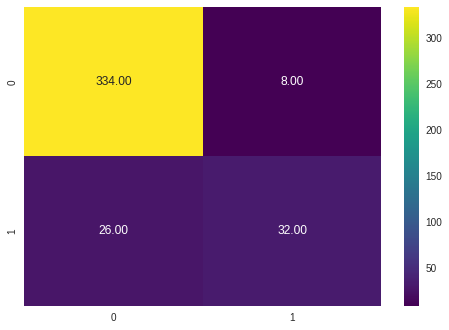

In [25]:
sns.heatmap(confusion_matrix(y_t, pred), annot=True, fmt='.2f', cmap='viridis');

0.915

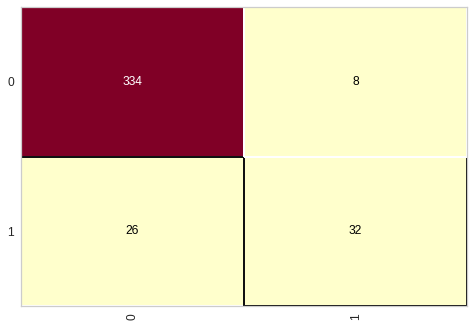

In [26]:
cm = ConfusionMatrix(nb_cr)
cm.fit(X_tr, y_tr)
cm.score(X_t, y_t)

In [27]:
print(classification_report(y_t, pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       342
           1       0.80      0.55      0.65        58

    accuracy                           0.92       400
   macro avg       0.86      0.76      0.80       400
weighted avg       0.91      0.92      0.91       400



## Census

In [37]:
with open('/home/tuts/data/mldsfromatoz/census.pkl', 'rb') as f:
    X_tr, y_tr, X_t, y_t = pickle.load(f)

In [38]:
X_tr.shape, y_tr.shape

((27676, 108), (27676,))

In [39]:
X_t.shape, y_t.shape

((4885, 108), (4885,))

In [40]:
cen_nb = GaussianNB()

cen_nb.fit(X_tr, y_tr)

pred = cen_nb.predict(X_t)

print(classification_report(y_t, pred))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885



In [41]:
accuracy_score(y_t, pred) # bad results here

0.4767656090071648

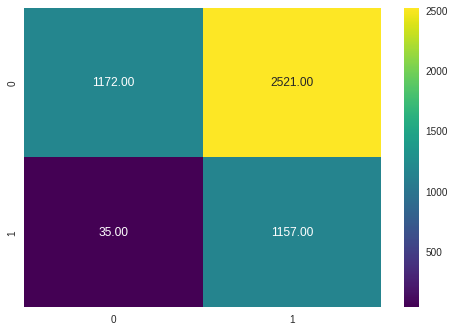

In [43]:
sns.heatmap(confusion_matrix(y_t, pred), annot=True, fmt='.2f', cmap='viridis');